In [108]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Для графиков
import matplotlib

%matplotlib inline
matplotlib.style.use('ggplot')

In [7]:
heart = pd.read_csv('data/heart.csv')

In [8]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


новый признак old, если пациент старше 60 лет

In [9]:
heart['old'] = heart['age'].apply(lambda x: 1 if x > 60 else 0)

In [10]:
heart['old'].sum()

79

Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола. trestbps — систолическое артериальное давление в состоянии покоя.

In [20]:
# Для каждого значения возраста в data_heart создаем интервал, которому он принадлежит.
# Границы интервалов задаем через bins:
age_intervals = pd.cut(heart.age, bins=[0, 20, 30, 40, 50, 60, np.inf])

# Создаем словари, задающие среднее значение верхнего давления.
# Ключ словаря: индекс интервала, значение: среднее значение давления
trestbps_man = {0: 123, 1: 126, 2:129, 3:135, 4:142, 5:142}
trestbps_woman = {0: 116, 1: 120, 2:127, 3:137, 4:144, 5:169}

# создаем столбец с именем 'trestbps_mean' и заполняем его каким-нибудь значением:
heart['trestbps_mean'] = 0



In [80]:
age_intervals

pandas.core.series.Series

In [76]:
# age_intervals.cat.codes.replace(replicants)
# age_intervals.cat.codes.astype('int16').replace(trestbps_man)

heart.loc[heart['sex'] == 1, 'trestbps_mean'] = age_intervals.cat.codes.astype('int16').replace(trestbps_man)
heart.loc[heart['sex'] == 0, 'trestbps_mean'] = age_intervals.cat.codes.astype('int16').replace(trestbps_woman)
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144


In [82]:
heart['trestbps_mean'][300]

142

Раскодируйте вышеперечисленные признаки методом OneHotEncoding без удаления исходных признаков.

In [99]:
import category_encoders as ce

In [104]:
encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal'])
encoder_bin = encoder.fit_transform(heart[['cp', 'restecg', 'slope', 'ca', 'thal']])

heart = pd.concat([heart, encoder_bin], axis=1)

Нормализация числовых признаков

In [107]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,...,0.462046,0.577558,0.125413,0.214521,0.066007,0.016502,0.059406,0.547855,0.386139,0.006601
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,...,0.499382,0.494765,0.331734,0.411169,0.248704,0.127605,0.236774,0.498528,0.487668,0.081110
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='age', ylabel='Density'>

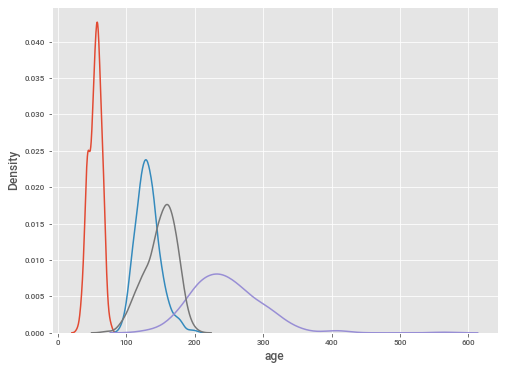

In [119]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
sns.kdeplot(heart['age'])
sns.kdeplot(heart['trestbps'])
sns.kdeplot(heart['chol'])
sns.kdeplot(heart['thalach'])
# sns.kdeplot(heart['oldpeak'])

In [114]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,0,0,0,0,1,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,0,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,1,0,0,0,0,0,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,1,0,0,0,0,0,1,0,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,1,0,0,0,0,0,1,0,0


Так как наши данные ещё не были очищены от выбросов, то нормализовать данные необходимо методом RObustSscaler

In [120]:
# скопируем названия столбцов
col_names = list(heart.columns)

In [124]:
# инициализируем нормализатор RobustScaler
r_scaller = preprocessing.RobustScaler()

# копируем исходный датасет
df_r = r_scaller.fit_transform(heart)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
heart = pd.DataFrame(df_r, columns=col_names)
heart


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,0.592593,0.0,1.0,0.75,-0.110236,1.0,-1.0,-0.092308,0.0,0.9375,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0
1,-1.333333,0.0,0.5,0.00,0.157480,0.0,0.0,1.046154,0.0,1.6875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.037037,-1.0,0.0,0.00,-0.566929,0.0,-1.0,0.584615,0.0,0.3750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.074074,0.0,0.0,-0.50,-0.062992,0.0,0.0,0.769231,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.148148,-1.0,-0.5,-0.50,1.795276,0.0,0.0,0.307692,1.0,-0.1250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.148148,-1.0,-0.5,0.50,0.015748,0.0,0.0,-0.923077,1.0,-0.3750,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0
299,-0.740741,0.0,1.0,-1.00,0.377953,0.0,0.0,-0.646154,0.0,0.2500,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0
300,0.962963,0.0,-0.5,0.70,-0.740157,1.0,0.0,-0.369231,0.0,1.6250,...,1.0,-1.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0
301,0.148148,0.0,-0.5,0.00,-1.716535,0.0,0.0,-1.169231,1.0,0.2500,...,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0,0.0


<AxesSubplot:xlabel='age', ylabel='Density'>

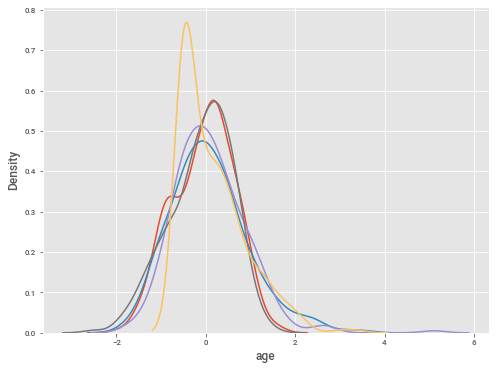

In [125]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
sns.kdeplot(heart['age'])
sns.kdeplot(heart['trestbps'])
sns.kdeplot(heart['chol'])
sns.kdeplot(heart['thalach'])
sns.kdeplot(heart['oldpeak'])

In [128]:
heart.chol.std()

0.8162322990225203

Провозим корреляционный анализ

In [132]:
corr_data = heart.corr()

for line in corr_data.index:
    for row in corr_data.columns:
        if np.absolute(corr_data.loc[line, row]) > 0.7 and line != row:
            print(f'{line} -- {row} -- {corr_data.loc[line, row]}')

age -- old -- 0.7180284360485248
cp -- cp_4 -- -0.8872562683326203
restecg -- restecg_1 -- -0.9763864896164194
restecg -- restecg_2 -- 0.9019340199428166
slope -- slope_2 -- 0.9169332378804449
ca -- ca_1 -- -0.8353587690586362
thal -- thal_3 -- 0.8906917134758264
old -- age -- 0.7180284360485248
cp_4 -- cp -- -0.8872562683326203
restecg_1 -- restecg -- -0.9763864896164194
restecg_1 -- restecg_2 -- -0.973934361546568
restecg_2 -- restecg -- 0.9019340199428166
restecg_2 -- restecg_1 -- -0.973934361546568
slope_2 -- slope -- 0.9169332378804449
slope_2 -- slope_3 -- -0.8703650629236378
slope_3 -- slope_2 -- -0.8703650629236378
ca_1 -- ca -- -0.8353587690586362
thal_2 -- thal_3 -- -0.8730321138511453
thal_3 -- thal -- 0.8906917134758264
thal_3 -- thal_2 -- -0.8730321138511453
